In [4]:
import pandas as pd

In [5]:
dataset=pd.read_csv('/stock_data.csv')

# New section

# New section

In [6]:
dataset.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [7]:
dataset.shape

(5791, 2)

In [8]:
dataset.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [9]:
count=0
for value in dataset['Sentiment']:
    if value==-1:
        count=count+1
print(count)

2106


In [10]:
count=0
for value in dataset['Sentiment']:
    if value==1:
        count=count+1
print(count)

3685


In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

In [14]:
tokenizer.fit_on_texts(dataset['Text'])

In [15]:
train_x = pad_sequences(tokenizer.texts_to_sequences(dataset['Text']),padding='pre', maxlen=50)
print(train_x)

[[ 0  0  0 ... 80  1  1]
 [ 0  0  0 ...  2  1  1]
 [ 0  0  0 ... 31  4  1]
 ...
 [ 0  0  0 ... 12 13  1]
 [ 0  0  0 ... 12 13  1]
 [ 0  0  0 ... 12 13  1]]


In [16]:
y=dataset['Sentiment']

In [17]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5786   -1
5787   -1
5788    1
5789    1
5790    1
Name: Sentiment, Length: 5791, dtype: int64


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000, 1000, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=False)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history=model.fit(train_x,y,epochs=50)

Epoch 1/50
181/181 [==============================] - 12s 41ms/step - loss: 0.5584 - accuracy: 0.0699
Epoch 2/50
181/181 [==============================] - 7s 41ms/step - loss: -0.0367 - accuracy: 0.2083
Epoch 3/50
181/181 [==============================] - 8s 41ms/step - loss: -11.4788 - accuracy: 0.3234
Epoch 4/50
181/181 [==============================] - 7s 41ms/step - loss: -66.3960 - accuracy: 0.3240
Epoch 5/50
181/181 [==============================] - 8s 42ms/step - loss: -268.6889 - accuracy: 0.2588
Epoch 6/50
181/181 [==============================] - 7s 41ms/step - loss: -584.3461 - accuracy: 0.2861
Epoch 7/50
181/181 [==============================] - 7s 41ms/step - loss: -1203.7163 - accuracy: 0.2963
Epoch 8/50
181/181 [==============================] - 7s 41ms/step - loss: -2267.6978 - accuracy: 0.2810
Epoch 9/50
181/181 [==============================] - 7s 41ms/step - loss: -3630.3442 - accuracy: 0.1989
Epoch 10/50
181/181 [==============================] - 8s 43ms/step

KeyError: ignored

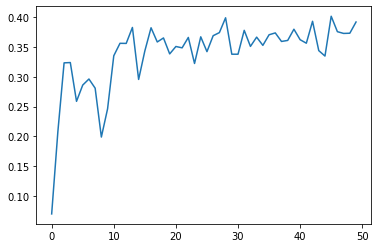

In [24]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, 'accuracy')

In [25]:
test=["this time market seems to be good",
      "i cannot say anything this time it may be good may be bad",
      "my money died its lost",
      "i became billionaire yeah",
      "i got profit",
      ]


tokenizer1 = Tokenizer(num_words = 50, oov_token="<OOV>")
tokenizer1.fit_on_texts(test)
test_x = pad_sequences(tokenizer1.texts_to_sequences(test),padding='pre', maxlen=50)

In [26]:
result=model.predict(test_x)

In [27]:
final=[]
for i in range(len(result)):
    if result[i] >=0.5:
        final.append(1)
    else:
        final.append(-1)

In [28]:
final

[-1, -1, -1, 1, -1]